## Loan Applications

#### 1. Business Understanding

### a. Introduction
In the financial industry, loan applications undergo a rigorous manual review process to determine whether they should be approved or rejected. This process involves significant labor costs and time, as human reviewers meticulously evaluate each application based on various characteristics and criteria. Given the substantial volume of applications, there is a growing need for an automated solution that can efficiently and accurately predict the outcome of loan applications, thereby reducing labor costs and improving decision-making speed.

-------------------------------------------------------------------------------------
### b. Problem Statement
The manual evaluation of loan applications is costly and resource-intensive, requiring significant human labor and time. As the volume of applications grows, the need for more staff increases, escalating costs further. This process also risks variability and inconsistency in decisions. Therefore, there is a need for an automated solution to efficiently and accurately evaluate loan applications, reducing labor costs and minimizing human error.

------------------------------------------------------------------------------------
### c. Objective
#### Main Objective
- To create a machine learning model that would automatically reject or approve loan applications.

#### Specific Objectives
- Develop a machine learning model to predict the AR target variable.
- Determine optimal probability thresholds for automatically rejecting or approving loan applications to minimize labor costs and losses from incorrect decisions.
- Provide a concise description of the prediction model and the variables used.
- Summarize the business impact, including cost and loss differences, if the model were implemented in live decisions, using appropriate visualizations.






### Import Libraries

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from warnings import filterwarnings
filterwarnings(action='ignore')

In [105]:
# Loading the dataset
loan = pd.read_csv('Twino_data.csv')
loan.head(10)

,application_id,AR,payment_method,client_first_lapp_mark,client_first_manual_lapp_mark,warning_count,address_check_1,address_check_2,address_check_3,address_check_4,...,other_29,data_quality_30,other_31,data_quality_32,data_quality_33,data_quality_34,data_quality_35,other_36,accounts_check_37,accounts_check_38
0,1,0,METHOD1,Yes,Yes,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,0,METHOD1,No,Yes,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,0,METHOD1,No,Yes,6,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,0,METHOD1,No,Yes,7,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,0,METHOD1,No,No,5,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5,6,0,METHOD1,Yes,Yes,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,7,1,METHOD1,Yes,Yes,11,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
7,8,1,METHOD1,Yes,Yes,7,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,9,1,METHOD1,Yes,Yes,6,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
9,10,1,METHOD1,No,Yes,4,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [106]:
# a summary of the dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9898 entries, 0 to 9897
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   application_id                 9898 non-null   int64 
 1   AR                             9898 non-null   int64 
 2   payment_method                 9898 non-null   object
 3   client_first_lapp_mark         9898 non-null   object
 4   client_first_manual_lapp_mark  9898 non-null   object
 5   warning_count                  9898 non-null   int64 
 6   address_check_1                9898 non-null   bool  
 7   address_check_2                9898 non-null   bool  
 8   address_check_3                9898 non-null   bool  
 9   address_check_4                9898 non-null   bool  
 10  accounts_check_5               9898 non-null   bool  
 11  accounts_check_6               9898 non-null   bool  
 12  data_comparison_7              9898 non-null   bool  
 13  dat

#### Data Cleaning

In [107]:

# Checking for missing values
loan.isnull().sum()

application_id                   0
AR                               0
payment_method                   0
client_first_lapp_mark           0
client_first_manual_lapp_mark    0
warning_count                    0
address_check_1                  0
address_check_2                  0
address_check_3                  0
address_check_4                  0
accounts_check_5                 0
accounts_check_6                 0
data_comparison_7                0
data_comparison_8                0
data_comparison_9                0
data_comparison_10               0
data_comparison_11               0
data_comparison_12               0
data_comparison_13               0
data_comparison_14               0
data_comparison_15               0
creditcard_check_16              0
creditcard_check_17              0
creditcard_check_18              0
data_quality_19                  0
data_quality_20                  0
other_21                         0
other_22                         0
data_quality_23     

In [108]:
# Checking for duplicates
duplicates = loan.duplicated().sum()
duplicates

0

In [109]:

# Droping application_id

loan = loan.drop('application_id', axis=1)
loan.head()

,AR,payment_method,client_first_lapp_mark,client_first_manual_lapp_mark,warning_count,address_check_1,address_check_2,address_check_3,address_check_4,accounts_check_5,...,other_29,data_quality_30,other_31,data_quality_32,data_quality_33,data_quality_34,data_quality_35,other_36,accounts_check_37,accounts_check_38
0,0,METHOD1,Yes,Yes,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,METHOD1,No,Yes,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,METHOD1,No,Yes,6,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,METHOD1,No,Yes,7,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,METHOD1,No,No,5,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


### Exploratory Data Analysis

In [110]:
loan.describe()


,AR,warning_count
count,9898.000000,9898.000000
mean,0.342999,5.136593
std,0.474735,2.377723
min,0.000000,1.000000
25%,0.000000,3.000000
50%,0.000000,5.000000
75%,1.000000,7.000000
max,1.000000,16.000000


Distribution of the Target Variable (AR)

In [111]:
# Checking how many classes are there.
loan["AR"].value_counts()

AR
0    6503
1    3395
Name: count, dtype: int64

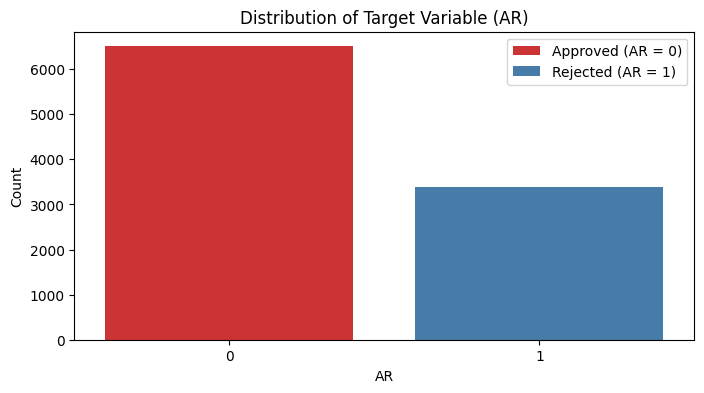

In [112]:
# Plotting the distribution of the target variable(AR)
plt.figure(figsize=(8, 4))
sns.countplot(x='AR', data=loan, palette='Set1')
plt.title('Distribution of Target Variable (AR)')
plt.xlabel('AR')
plt.ylabel('Count')
plt.legend(labels=['Approved (AR = 0)', 'Rejected (AR = 1)'], loc='upper right')

plt.show()


### Bivariate Analysis

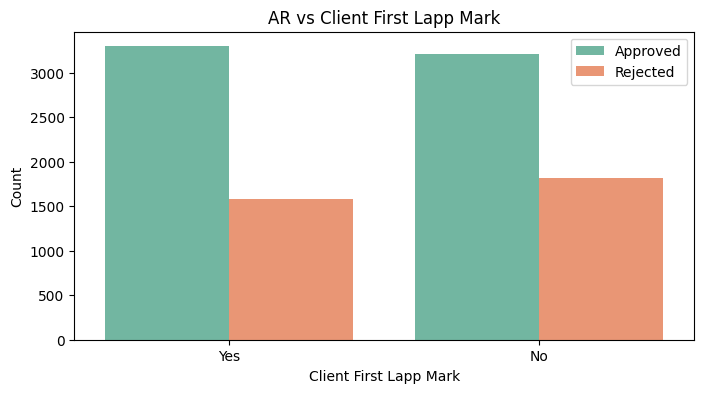

In [113]:
# AR vs Client First Lapp Mark

plt.figure(figsize=(8, 4))
sns.countplot(x='client_first_lapp_mark', hue='AR', data=loan, palette='Set2')
plt.title('AR vs Client First Lapp Mark')
plt.xlabel('Client First Lapp Mark')
plt.ylabel('Count')
plt.legend(labels=['Approved', 'Rejected'])
plt.show()


- The countplot visually contrasts loan approval outcomes (AR) based on whether applicants have a prior loan application (client_first_lapp_mark), aiming to uncover actionable insights for enhancing approval processes.

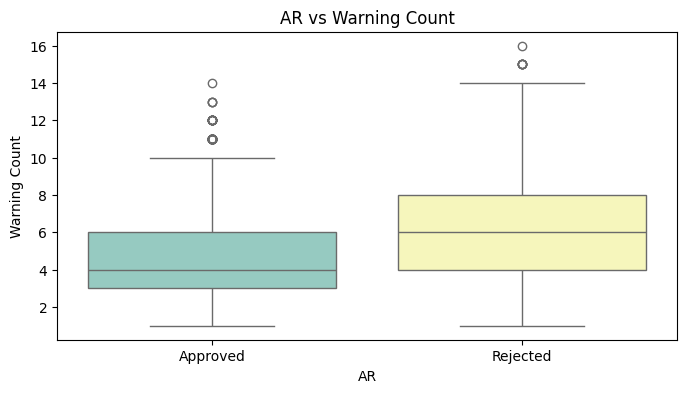

In [114]:
# AR vs Warning Count (Numerical Analysis)

plt.figure(figsize=(8, 4))
sns.boxplot(x='AR', y='warning_count', data=loan, palette='Set3')
plt.title('AR vs Warning Count')
plt.xlabel('AR')
plt.ylabel('Warning Count')
plt.xticks([0, 1], ['Approved', 'Rejected'])
plt.show()


- These box plot will give insights to optimize the loan approval process, ensuring that decisions are fair, consistent, and aligned with risk management objectives.

## Data Preprocessing

### Encoding

In [115]:
#  columns to encode

from sklearn.preprocessing import LabelEncoder

categorical_columns = ['payment_method', 'client_first_lapp_mark', 'client_first_manual_lapp_mark']
boolean_columns = loan.select_dtypes(include=['bool']).columns



# coping of the DataFrame for encoding
loan_encoded = loan.copy()


# Labeling encoding for categorical columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    loan_encoded[column] = le.fit_transform(loan_encoded[column])
    label_encoders[column] = le


# Converting boolean columns to integers
loan_encoded[boolean_columns] = loan_encoded[boolean_columns].astype(int)

### Handling class imbalance

In [116]:
from imblearn.over_sampling import SMOTE

# Separating features and target variable
X = loan_encoded.drop('AR', axis=1)
y = loan_encoded['AR']

# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


# Printing the class distribution after applying SMOTE
print(y_resampled.value_counts())




AR
0    6503
1    6503
Name: count, dtype: int64


### Train-Test Split

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Feature Scaling

In [118]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Modelling
### Baseline Model: Logistic Regression

Accuracy Score: 0.7404040404040404

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82      1305
           1       0.66      0.49      0.56       675

    accuracy                           0.74      1980
   macro avg       0.71      0.68      0.69      1980
weighted avg       0.73      0.74      0.73      1980



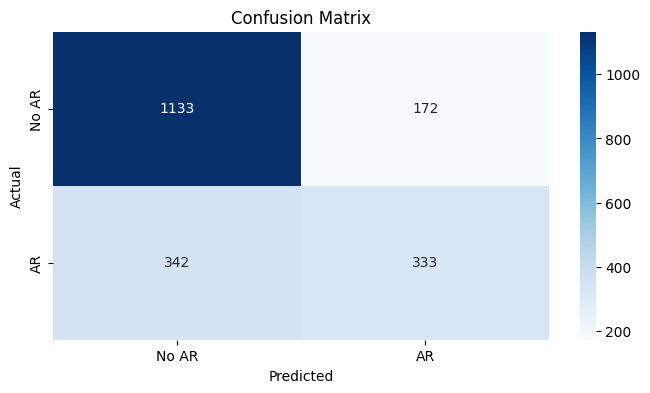

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Fiting the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Making predictions
y_pred = log_reg.predict(X_test_scaled)

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculating accuracy score and classification report
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Printing accuracy score and classification report
print("Accuracy Score:", accuracy)
print("\nClassification Report:\n", class_report)

# Ploting the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No AR', 'AR'], yticklabels=['No AR', 'AR'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [120]:
# Training accuracy
train_accuracy = accuracy_score(y_train, log_reg.predict(X_train_scaled))
print(f"Training Accuracy: {train_accuracy:.4f}")

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.7267
Test Accuracy: 0.7404


### Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier


# Initializing the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Fiting the model on the training data
rf_clf.fit(X_train, y_train)

# Predicting on the test data
y_pred = rf_clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}\n")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {conf_matrix}\n")

class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n {class_report}")


Accuracy Score: 0.7217

Confusion Matrix:
 [[1078  227]
 [ 324  351]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80      1305
           1       0.61      0.52      0.56       675

    accuracy                           0.72      1980
   macro avg       0.69      0.67      0.68      1980
weighted avg       0.71      0.72      0.72      1980



### Support Vector Machine

In [122]:
from sklearn.svm import SVC


# Initializing the SVM classifier
svm_clf = SVC(kernel='rbf', random_state=42)  

# Fiting the model on the training data
svm_clf.fit(X_train, y_train)

# Predicting on the test data
y_pred = svm_clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}\n")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {conf_matrix}\n")

class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n {class_report}")


Accuracy Score: 0.7354

Confusion Matrix:
 [[1125  180]
 [ 344  331]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81      1305
           1       0.65      0.49      0.56       675

    accuracy                           0.74      1980
   macro avg       0.71      0.68      0.68      1980
weighted avg       0.73      0.74      0.72      1980



### XG BOOST

In [123]:
import xgboost as xgb


# Initializing the XGBClassifier
xgb_clf = xgb.XGBClassifier(random_state=42)

# Fitting the model on the training data
xgb_clf.fit(X_train, y_train)

# Predicting on the test data
y_pred = xgb_clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}\n")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {conf_matrix}\n")

class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n {class_report}")


Accuracy Score: 0.7389

Confusion Matrix:
 [[1111  194]
 [ 323  352]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81      1305
           1       0.64      0.52      0.58       675

    accuracy                           0.74      1980
   macro avg       0.71      0.69      0.69      1980
weighted avg       0.73      0.74      0.73      1980



### Hyperparameter Tuning (Logistic Regression)

In [124]:
from sklearn.model_selection import GridSearchCV

# Defining the parameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],              # Regularization penalty ('l1' or 'l2')
    'solver': ['liblinear', 'saga']       # Optimization algorithm
}

# Initializing GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1)  

# Fitting GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV Score: 0.7230372263379212


In [125]:
# Using the best parameters found by GridSearchCV 
best_log_reg = grid_search.best_estimator_  

# Retraining with best parameters
best_log_reg.fit(X_train_scaled, y_train)

# Predicting on test data
y_pred_tuned = best_log_reg.predict(X_test_scaled)

# Evaluating the tuned model
print("Tuned Model Accuracy Score:", accuracy_score(y_test, y_pred_tuned))
print("\nTuned Model Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("\nTuned Model Classification Report:\n", classification_report(y_test, y_pred_tuned))


Tuned Model Accuracy Score: 0.7404040404040404

Tuned Model Confusion Matrix:
 [[1136  169]
 [ 345  330]]

Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82      1305
           1       0.66      0.49      0.56       675

    accuracy                           0.74      1980
   macro avg       0.71      0.68      0.69      1980
weighted avg       0.73      0.74      0.73      1980



#### The best performing model is Logistic Regression Model

### Calculating the threshhold

In [126]:



# Get predicted probabilities
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Initializing the  variables
thresholds = np.arange(0.0, 1.0, 0.01)
best_threshold = 0
min_cost = float('inf')

for threshold in thresholds:
    # Getting predicted labels based on threshold
    y_pred_threshold = (y_prob >= threshold).astype(int)
    
    # Calculating confusion matrix
    TN, FP, FN, TP = confusion_matrix(y_test, y_pred_threshold).ravel()
    
    # Calculating costs
    labor_cost = 5 * len(y_test)  # Cost for processing all applications
    loss_FP = 17 * FP
    loss_FN = 14 * FN
    total_cost = labor_cost + loss_FP + loss_FN
    
    # Checking if this is the best threshold
    if total_cost < min_cost:
        min_cost = total_cost
        best_threshold = threshold

print(f'Best Threshold: {best_threshold}, Minimum Cost: {min_cost} EUR')


Best Threshold: 0.59, Minimum Cost: 17448 EUR


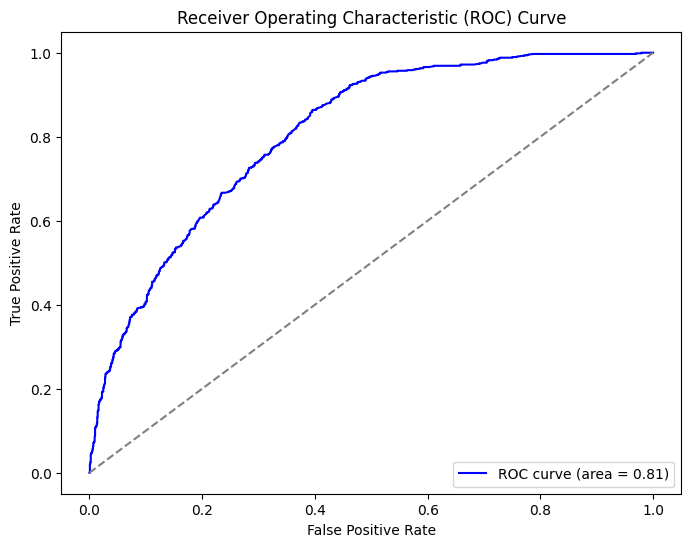

In [127]:

from sklearn.metrics import roc_curve, roc_auc_score

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()




- An AUC of 0.81 suggests that there is a 81% chance that the model will be able to distinguish between positive and negative classes.

### Cost vs Threshhold

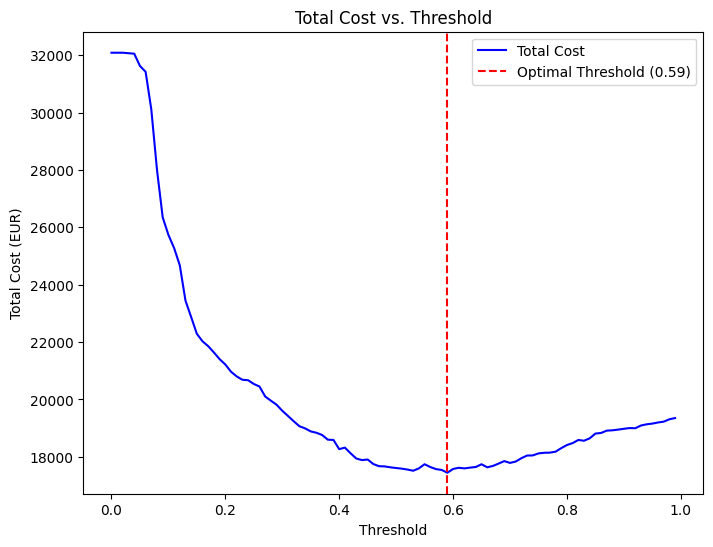

In [128]:
# Cost vs. Threshold Plot
costs = []
for threshold in np.arange(0.0, 1.0, 0.01):
    y_pred_threshold = (y_prob >= threshold).astype(int)
    TN, FP, FN, TP = confusion_matrix(y_test, y_pred_threshold).ravel()
    labor_cost = 5 * len(y_test)
    loss_FP = 17 * FP
    loss_FN = 14 * FN
    total_cost = labor_cost + loss_FP + loss_FN
    costs.append(total_cost)

plt.figure(figsize=(8, 6))
plt.plot(np.arange(0.0, 1.0, 0.01), costs, color='blue', label='Total Cost')
plt.axvline(x=0.59, color='red', linestyle='--', label='Optimal Threshold (0.59)')
plt.xlabel('Threshold')
plt.ylabel('Total Cost (EUR)')
plt.title('Total Cost vs. Threshold')
plt.legend(loc='upper right')
plt.show()


### Business Impact Analysis

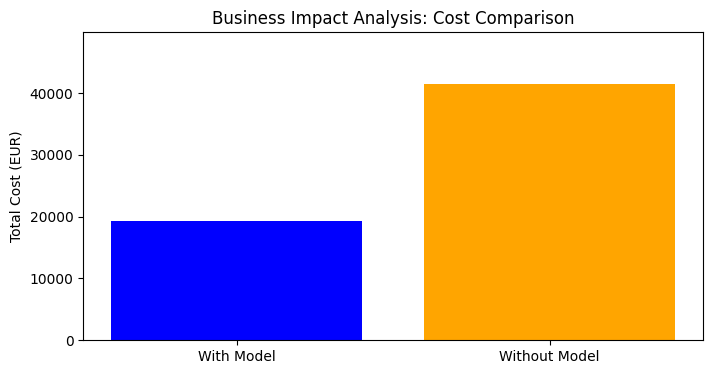

In [129]:
# Costs with the model (using optimal threshold)
labor_cost_model = 5 * (TP + FP + TN + FN)  # Total labor cost for all applications

#  costs per instance
cost_FP = 17  # Cost per false positive
cost_FN = 14  # Cost per false negative

total_cost_model = labor_cost_model + (cost_FP * FP) + (cost_FN * FN)

# Costs without the model (processing all applications)
total_cost_without_model = labor_cost_model + (cost_FP * (FP + TN)) + (cost_FN * (FN + TP))

# Visualizing the comparison
categories = ['With Model', 'Without Model']
costs = [total_cost_model, total_cost_without_model]

plt.figure(figsize=(8, 4))
plt.bar(categories, costs, color=['blue', 'orange'])
plt.ylabel('Total Cost (EUR)')
plt.title('Business Impact Analysis: Cost Comparison')
plt.ylim(0, max(costs) * 1.2)  
plt.show()


### The visualization vividly demonstrates the financial advantages of deploying the Logistic Regression Model for loan approval decisions